# ヒストグラム その3: 2次元ヒストグラム
## 目的
このチュートリアルでは2次元ヒストグラムを計算し可視化する方法を学ぶ．

## イントロダクション
最初のチュートリアルで1次元ヒストグラムの計算方法及び描画方法を学んだ．１つの特徴(グレースケール画像の画素値)しか見ていないために「1次元」と呼んでいる．2次元ヒストグラムを計算するためには2個の特徴について考えなければならない．そこで普通、画素のHueとSaturationという二つの特徴を考える．

[pythonの公式サンプル](https://github.com/Itseez/opencv/blob/master/samples/python2/color_histogram.py) にカラーヒストグラムの計算方法が含まれている．そのようなカラーヒストグラムを作成する方法を理解し，これ以降のトピックであるヒストグラムの逆投影法の理解にも役に立つことを学ぶ．

## OpenCVの2次元ヒストグラム
1次元ヒストグラムと同様 [cv2.calcHist() ](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_2d_histogram/py_2d_histogram.html)関数を使う．カラーヒストグラムを計算するために，カラー画像をBGRからHSVへと変換する必要がある(1次元ヒストグラムの計算をする時はBGRをグレースケールに変換した)．2次元ヒストグラムを計算するために，パラメータを以下のように変更する．:

* `channels = [0,1]`    HとSの二つの色成分を処理するため
* `bins = [180,256]`    H成分のために180，S成分のために256
* `range = [0,180,0,256]`    Hue値は0から180まで，Saturation値は0から256まで
コードは以下のようになる:([画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_2d_histogram/home.jpg))

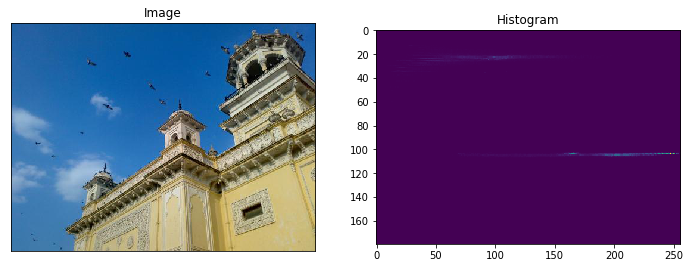

In [14]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('home.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.figure(figsize=(12,8))
plt.subplot(1,2,1), plt.imshow(img)
plt.xticks([]),plt.yticks([]),plt.title('Image')
plt.subplot(1,2,2), plt.imshow(hist,interpolation = 'nearest')
plt.title('Histogram')

plt.show()

## Numpyを使った2次元ヒストグラム
Numpyも2次元ヒストグラムの計算をするための関数を用意している : [np.histogram2d()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html#numpy.histogram2d). (1次元ヒストグラムを計算する関数は [np.histogram()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html#numpy.histogram) である)．([画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_2d_histogram/home.jpg))

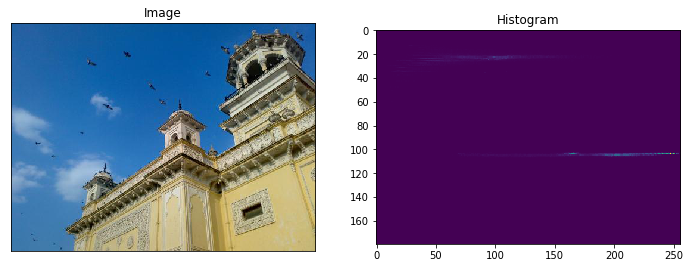

In [13]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('home.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# print(hsv)

hist, xbins, ybins = np.histogram2d(hsv[:,:,0].ravel(),hsv[:,:,1].ravel(),[180,256],[[0,180],[0,256]])

img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1), plt.imshow(img)
plt.xticks([]),plt.yticks([]),plt.title('Image')
plt.subplot(1,2,2), plt.imshow(hist,interpolation = 'nearest')
plt.title('Histogram')
plt.show()


関数`np.histogram2d()`の第1引数はH成分，第2引数はS成分，第3引数は各成分のビンの数，第4引数は各成分の範囲を表す．

次に，計算したカラーヒストグラムの表示方法を確認しよう．

## 2次元ヒストグラムの可視化
### 方法1 : 関数`cv2.imshow()`を使う
我々が取得した2次元配列のサイズは180x256である． いつも通り`cv2.imshow()`関数を使って可視化する．結果の可視化はグレースケール画像になる．いろいろな色のHueの値を知るまでは、どの色が何を意味するのかさほど重要ではないだろう．

### 方法2 : Matplotlibを使う
`matplotlib.pyplot.imshow() `関数を使って2次元ヒストグラムをいろいろなカラーマップで表示できる．異なる画素密度についてより良い結果を作れる．いろいろな色のHueの値を知るまでは、それぞれが何を意味するのか理解できないことだろう．それでも，単純なこの方法が好ましい．

<font color="blue">Note</font>:  この関数を使って良い結果を得るためには，`interpolation` (内挿)フラグを `nearest`にしよう．

次のコードを考えてみよう:([画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_2d_histogram/home.jpg))



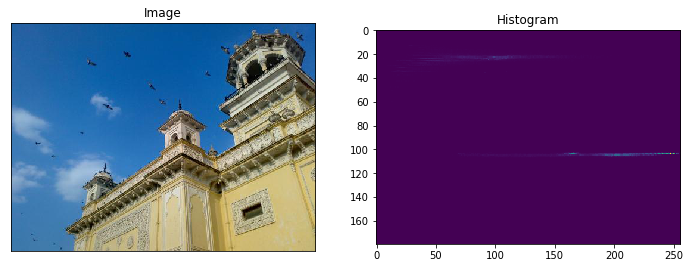

In [12]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('home.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1), plt.imshow(img)
plt.xticks([]),plt.yticks([]),plt.title('Image')
plt.subplot(1,2,2), plt.imshow(hist,interpolation = 'nearest')
plt.title('Histogram')

plt.show()

入力画像とそのカラーヒストグラムが示された．ここで横軸がS成分，縦軸がH成分を表す．

ヒストグラムを見ると，H = 100，S = 200の辺りに高い値を示しているのが分かる．これは空の青色に対応している．もう一つのピークがH = 25，S = 100の辺りに見える．これは宮殿の黄色に対応している．GIMPなどの画像編集ソフトを使って確認できる．

## 方法3 : OpenCVのサンプル方式!!
OpenCV-Python2のサンプルコードの中に [カラーヒストグラムを作成するサンプル](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_2d_histogram/color_histogram.py) が含まれている．コードを実行すると，ヒストグラムが対応する色も表示することが分かる．別の言い方をすると色でコード化されたヒストグラムと呼べるだろう．結果はとても素晴らしいい(ただし、数行のコードを追加する必要がある)．

コード中で，作者はカラーマップをHSV空間で作成し，その後にBGR空間に変換している．結果として得られるヒストグラム画像は、カラーマップと掛け算される．また、作者は小さな孤立したピクセルを取り除くために前処理をいくつか行っており、結果としてとてもよいヒストグラムが得られている．

コードの実行，解析，改造は皆さんが行うこと．上記の画像に対してそのコードを実行した結果は次のようになる:

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/2dhist_opencv.jpg)

ヒストグラムにどんな色があるか、はっきりわかるだろう: 青や黄色、そしてチェスボードに由来する白色がみえるだろう．

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: [OpenCVでのヒストグラム](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/histogram.html) 
ヒストグラムについて学ぶ．
* 前の学習項目:  [ヒストグラム その2: ヒストグラム平坦化 histogramEqualization.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/histogramEqualization.html)<BR>
画像のコントラスト改善のためのヒストグラム平坦化
* 次の学習項目: [ヒストグラム その4: ヒストグラムの逆投影法 histogramBackProjection.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/histogramBackProjection.html)<BR>
色に基づいて領域分割するためのヒストグラム逆投影法